## Default Data set - Comparison of Validation set approach, Leave One Out CV and K Fold CV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

default = pd.read_csv('C:\\Users\\Paaru\\Desktop\\SJSU MSEE\\2nd sem - Spring 2018\\EE 259 - Intro to statistical learning\\data sets\\Default.csv', na_values='?').dropna()

In [2]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Unnamed: 0    10000 non-null int64
default       10000 non-null object
student       10000 non-null object
balance       10000 non-null float64
income        10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


In [3]:
default['default_value']=default.default.factorize()[0]
default.head()

,Unnamed: 0,default,student,balance,income,default_value
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,0
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0


## Validation set approach - Using 3 random splits of data

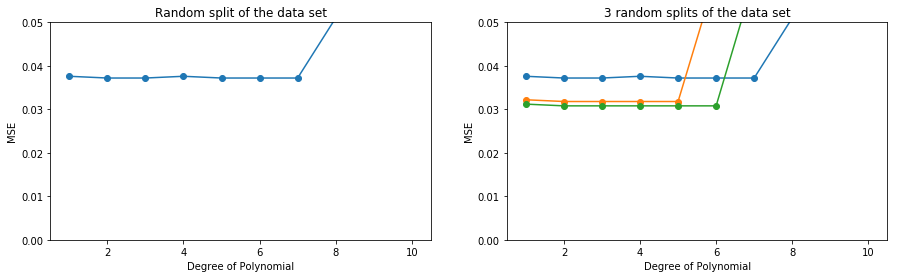

In [4]:
'''Splitting the data set into 2 equal parts randomly and verifying the 
        results using validation set approach '''

t_prop = 0.5 #dividing ratio

p_order = np.arange(1,11) #Considering 10 degrees of polynomial
r_state = np.arange(0,3) #Considering 3 random states

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))
regr = skl_lm.LogisticRegression()

# Generate 3 random splits of the dataset

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(default[['income','balance']])
    #Dividing into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X_poly, 
                                    default.default_value.ravel(),
                                    test_size=t_prop, random_state=Y[i,j])

    pred = regr.fit(X_train, y_train).predict(X_test)
    #Calculating the test error for each split and each degree
    Z[i,j]= mean_squared_error(y_test, pred) 
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

# Left plot : Considering only first split
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot : Considering all 3 random splits
ax2.plot(X,Z, '-o')
ax2.set_title('3 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('MSE')
    ax.set_ylim(0,0.05)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2))

## LOOCV and K Fold CV

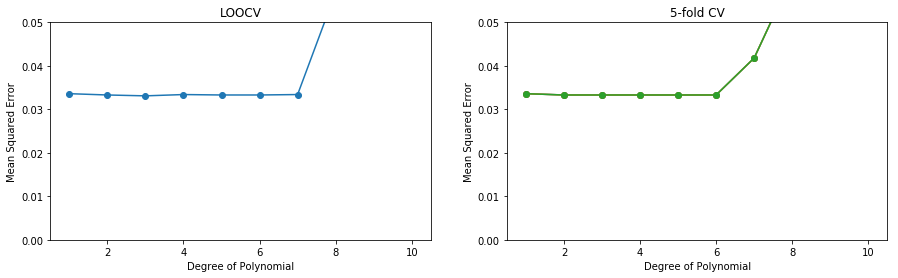

In [5]:
from sklearn.linear_model import LogisticRegression

p_order = np.arange(1,9) #Considering 8 degrees of polynomial
r_state = np.arange(0,3) #Considering 3 random states

regr = LogisticRegression()
loo  = LeaveOneOut() # LeaveOneOut CV - LOOCV
loo.get_n_splits(default)
scores = list()

for i in p_order:
    poly   = PolynomialFeatures(i)
    X_poly = poly.fit_transform(default[['income','balance']])
    score  = cross_val_score(regr, X_poly, default.default_value, 
                                 cv=loo, scoring='neg_mean_squared_error')
    scores.append(score.mean())
    

# k-fold CV with k = 5

folds    = 5
elements = len(default.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z    = np.zeros((p_order.size,r_state.size))

regr = LogisticRegression()

for (i,j),v in np.ndenumerate(Z):
    poly   = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(default[['income','balance']])
    kfold_5   = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, default.default_value,
                             cv=kfold_5, scoring='neg_mean_squared_error').mean()
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))



# Left plot - LOOCV
ax1.plot(p_order, np.array(scores)*-1, '-o') 
# cross_val_score() method return negative values for the scores.
ax1.set_title('LOOCV')

# Right plot - KFold
ax2.plot(X,Z*-1, '-o') 
ax2.set_title('5-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(0,0.05)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2))